In [39]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')

(584, 565, 3)


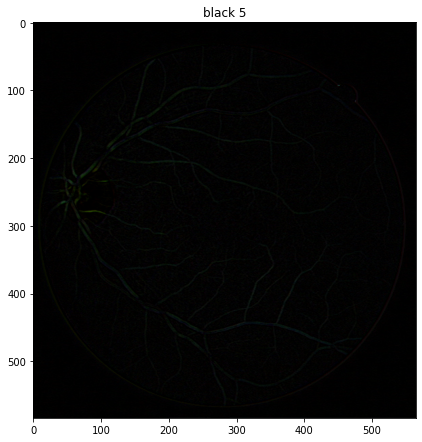

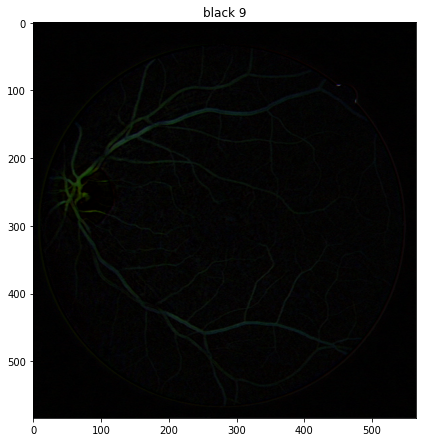

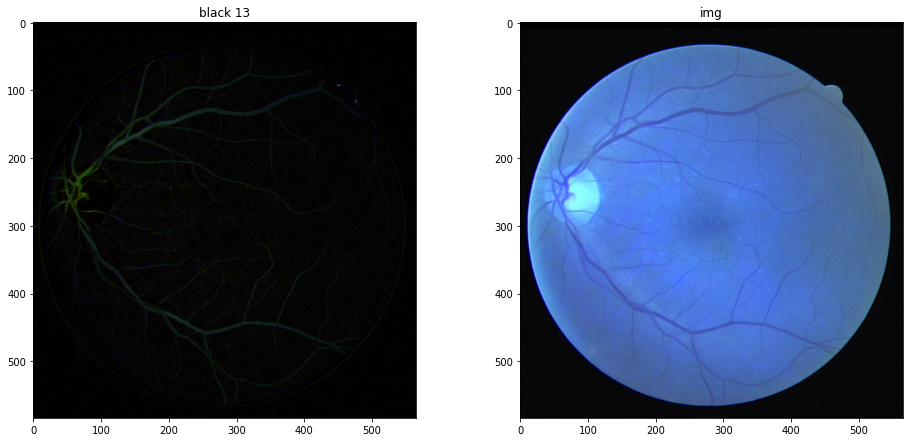

In [27]:
# import the necessary packages 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\21_training.tif") 
print(img.shape)


for i, size in enumerate([5,9,13]):

    img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\21_training.tif") 
    kernel = np.ones((size, size), np.uint8)
    blackh = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

    fig = plt.figure(figsize=(16,16))

    fig.add_subplot(2,2,i+1)
    plt.imshow(blackh)
    plt.title(f"black {size}")

fig.add_subplot(2,2,4)
plt.imshow(img)
plt.title("img")

plt.show()

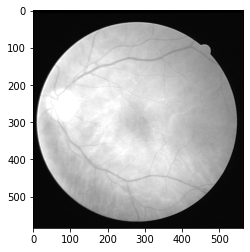

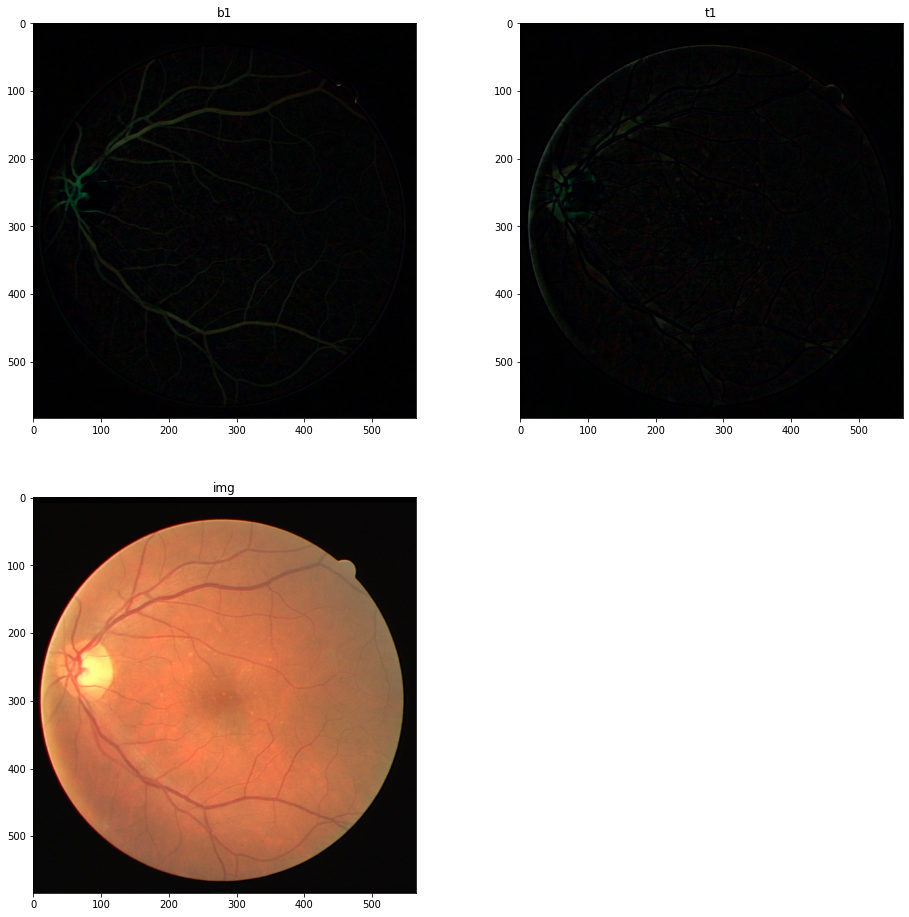

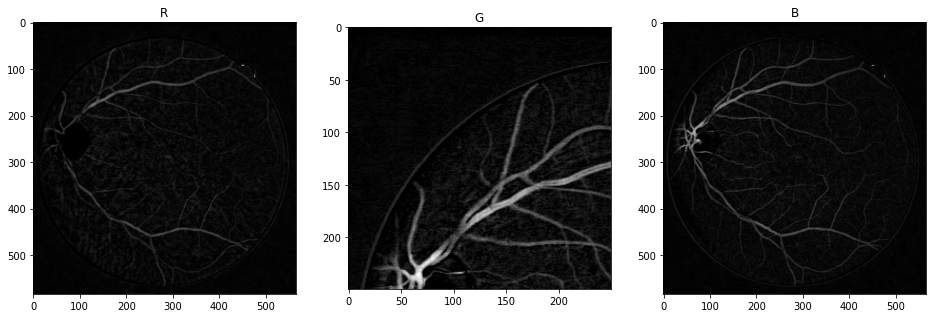

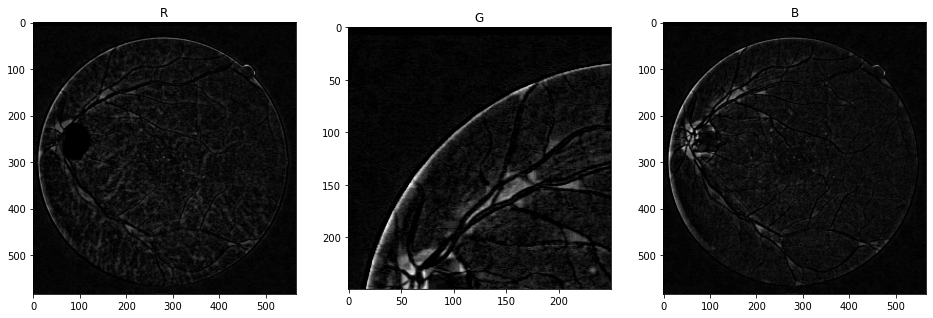

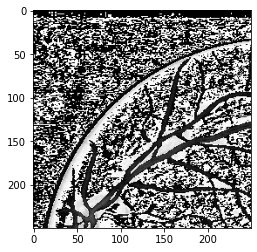

In [38]:
# import the necessary packages 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\21_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.imshow(img[:,:,0], cmap=plt.cm.gray)
plt.show()

kernel = np.ones((11, 11), np.uint8)

b1 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

kernel = np.ones((11, 11), np.uint8)

t1 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)


fig = plt.figure(figsize=(16,16))

fig.add_subplot(2,2,1)
plt.imshow(b1)
plt.title("b1")

fig.add_subplot(2,2,2)
plt.imshow(t1)
plt.title("t1")

fig.add_subplot(2,2,3)
plt.imshow(img)
plt.title("img")


plt.show()


fig = plt.figure(figsize=(16,16))

fig.add_subplot(1,3,1)
plt.imshow(b1[:,:,0], cmap=plt.cm.gray)
plt.title("R")

fig.add_subplot(1,3,2)
plt.imshow(b1[:250,:250,1], cmap=plt.cm.gray)
plt.title("G")

fig.add_subplot(1,3,3)
plt.imshow(b1[:,:,1], cmap=plt.cm.gray)
plt.title("B")

plt.show()

fig = plt.figure(figsize=(16,16))

fig.add_subplot(1,3,1)
plt.imshow(t1[:,:,0], cmap=plt.cm.gray)
plt.title("R")

fig.add_subplot(1,3,2)
plt.imshow(t1[:250,:250,1], cmap=plt.cm.gray)
plt.title("G")

fig.add_subplot(1,3,3)
plt.imshow(t1[:,:,1], cmap=plt.cm.gray)
plt.title("B")

plt.show()

grad = np.where((b1[:250,:250,1] - t1[:250,:250,1])>0,(b1[:250,:250,1] - t1[:250,:250,1]),0)

plt.imshow(grad, cmap=plt.cm.gray)
plt.show()

Text(0.5, 1.0, 'B')

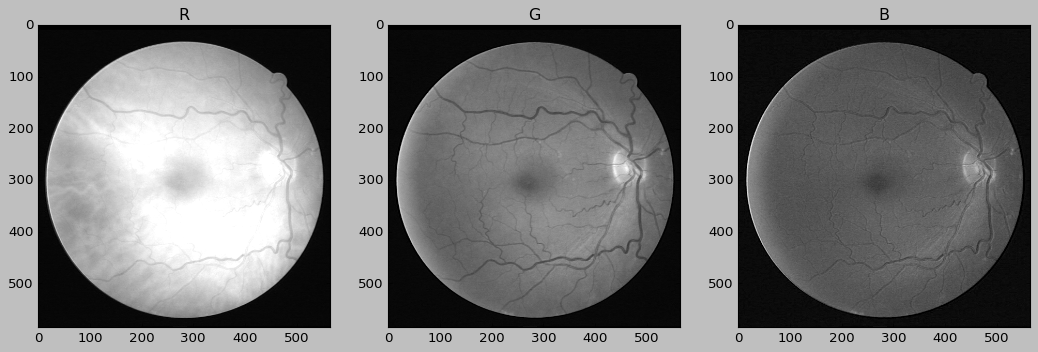

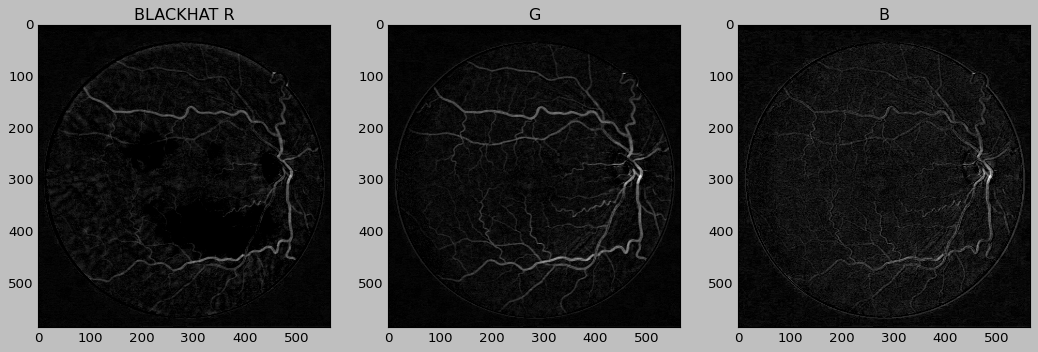

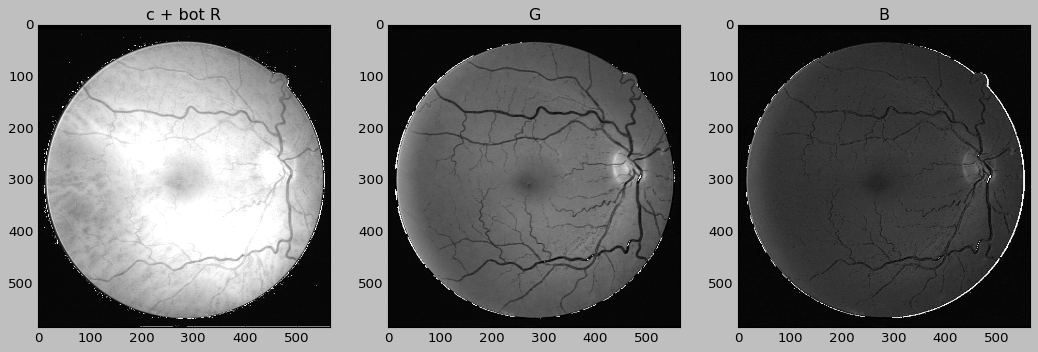

In [57]:
# import the necessary packages 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\22_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

(R,G,B) = cv2.split(img)

fig = plt.figure(figsize=(16,16))

fig.add_subplot(1,3,1)
plt.imshow(R, cmap=plt.cm.gray)
plt.title("R")

fig.add_subplot(1,3,2)
plt.imshow(G, cmap=plt.cm.gray)
plt.title("G")

fig.add_subplot(1,3,3)
plt.imshow(B, cmap=plt.cm.gray)
plt.title("B")

# biR = cv2.threshold(R, 0, 255, cv2.THRESH_BINARYcv2.THRESH_OTSU)
# biG = cv2.threshold(G, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# biB = cv2.threshold(B, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# fig = plt.figure(figsize=(16,16))

# fig.add_subplot(1,3,1)
# plt.imshow(biR, cmap=plt.cm.gray)
# plt.title("biR")

# fig.add_subplot(1,3,2)
# plt.imshow(biG, cmap=plt.cm.gray)
# plt.title("biG")

# fig.add_subplot(1,3,3)
# plt.imshow(biB, cmap=plt.cm.gray)
# plt.title("biB")

kernel = np.ones((13, 13), np.uint8)

R1 = cv2.morphologyEx(R, cv2.MORPH_BLACKHAT, kernel)
G1 = cv2.morphologyEx(G, cv2.MORPH_BLACKHAT, kernel)
B1 = cv2.morphologyEx(B, cv2.MORPH_BLACKHAT, kernel)

fig = plt.figure(figsize=(16,16))

fig.add_subplot(1,3,1)
plt.imshow(R1, cmap=plt.cm.gray)
plt.title("BLACKHAT R")

fig.add_subplot(1,3,2)
plt.imshow(G1, cmap=plt.cm.gray)
plt.title("G")

fig.add_subplot(1,3,3)
plt.imshow(B1, cmap=plt.cm.gray)
plt.title("B")


img2 = cv2.merge([B1,G1,R1])
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# fig = plt.figure(figsize=(8,8))
# plt.imshow(img2)
# plt.show()

kernel = np.ones((5,5),np.uint8)

R2 = cv2.erode(R1,kernel)
G2 = cv2.erode(G1,kernel)
B2 = cv2.erode(B1,kernel)

# fig = plt.figure(figsize=(16,16))

# fig.add_subplot(1,3,1)
# plt.imshow(R2, cmap=plt.cm.gray)
# plt.title("erode R")

# fig.add_subplot(1,3,2)
# plt.imshow(G2, cmap=plt.cm.gray)
# plt.title("G")

# fig.add_subplot(1,3,3)
# plt.imshow(B2, cmap=plt.cm.gray)
# plt.title("B")

R3 = cv2.dilate(R1,kernel)
G3 = cv2.dilate(G1,kernel)
B3 = cv2.dilate(B1,kernel)

# fig = plt.figure(figsize=(16,16))

# fig.add_subplot(1,3,1)
# plt.imshow(R3, cmap=plt.cm.gray)
# plt.title("dilate R")

# fig.add_subplot(1,3,2)
# plt.imshow(G3, cmap=plt.cm.gray)
# plt.title("G")

# fig.add_subplot(1,3,3)
# plt.imshow(B3, cmap=plt.cm.gray)
# plt.title("B")

R4 = cv2.erode(R3,kernel)
G4 = cv2.erode(G3,kernel)
B4 = cv2.erode(B3,kernel)

# fig = plt.figure(figsize=(16,16))

# fig.add_subplot(1,3,1)
# plt.imshow(R4, cmap=plt.cm.gray)
# plt.title("erode dilate R")

# fig.add_subplot(1,3,2)
# plt.imshow(G4, cmap=plt.cm.gray)
# plt.title("G")

# fig.add_subplot(1,3,3)
# plt.imshow(B4, cmap=plt.cm.gray)
# plt.title("B")


R5 = R4 + R1
G5 = G4 + G1
B5 = B4 + B1

# fig = plt.figure(figsize=(16,16))

# fig.add_subplot(1,3,1)
# plt.imshow(R5, cmap=plt.cm.gray)
# plt.title("+ R")

# fig.add_subplot(1,3,2)
# plt.imshow(G5, cmap=plt.cm.gray)
# plt.title("G")

# fig.add_subplot(1,3,3)
# plt.imshow(B5, cmap=plt.cm.gray)
# plt.title("B")

kernel = np.ones((5, 5), np.uint8)

R6 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, kernel)
G6 = cv2.morphologyEx(G1, cv2.MORPH_OPEN, kernel)
B6 = cv2.morphologyEx(B1, cv2.MORPH_OPEN, kernel)
R6 = cv2.morphologyEx(R6, cv2.MORPH_CLOSE, kernel)
G6 = cv2.morphologyEx(G6, cv2.MORPH_CLOSE, kernel)
B6 = cv2.morphologyEx(B6, cv2.MORPH_CLOSE, kernel)

# fig = plt.figure(figsize=(16,16))

# fig.add_subplot(1,3,1)
# plt.imshow(R6, cmap=plt.cm.gray)
# plt.title("close R")

# fig.add_subplot(1,3,2)
# plt.imshow(G6, cmap=plt.cm.gray)
# plt.title("G")

# fig.add_subplot(1,3,3)
# plt.imshow(B6, cmap=plt.cm.gray)
# plt.title("B")
R1 = np.where(R1>5,R1,0)
G1 = np.where(G1>10,G1,0)
B1 = np.where(B1>10,B1,0)
R7 = R - R1
G7 = G - G1
B7 = B - B1

fig = plt.figure(figsize=(16,16))

fig.add_subplot(1,3,1)
plt.imshow(R7, cmap=plt.cm.gray)
plt.title("c + bot R")

fig.add_subplot(1,3,2)
plt.imshow(G7, cmap=plt.cm.gray)
plt.title("G")

fig.add_subplot(1,3,3)
plt.imshow(B7, cmap=plt.cm.gray)
plt.title("B")

<Figure size 1280x1280 with 0 Axes>

<Figure size 1280x1280 with 0 Axes>

<Figure size 1280x1280 with 0 Axes>

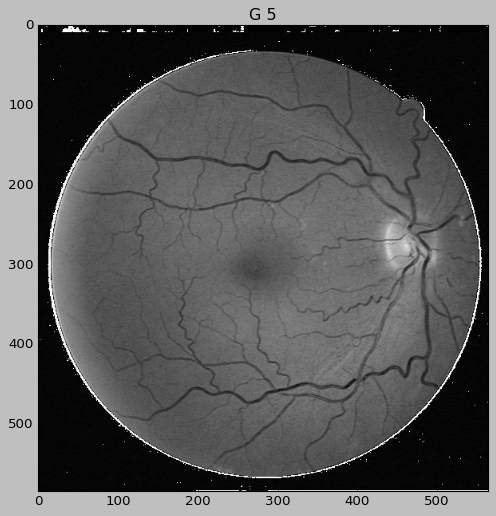

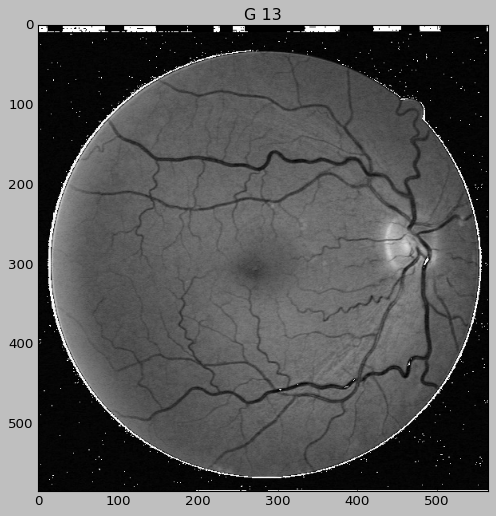

In [58]:
# import the necessary packages 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\22_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

(R,G,B) = cv2.split(img)

fig1 = plt.figure(figsize=(16,16))
fig2 = plt.figure(figsize=(16,16))
fig3 = plt.figure(figsize=(16,16))

for i, size in enumerate([5,13]):
    kernel = np.ones((size, size), np.uint8)
    G1 = cv2.morphologyEx(G, cv2.MORPH_BLACKHAT, kernel)
    G7 = G - G1
    
    fig1 = plt.figure(figsize=(16,16))
    # fig1.add_subplot(1,3,1)
    # plt.imshow(G1, cmap=plt.cm.gray)
    # plt.title(f"bot hat G {size}")

    # fig1.add_subplot(1,2,2)
    # plt.imshow(G7, cmap=plt.cm.gray)
    # plt.title(f"- G {size}")

    # fig1.add_subplot(1,2,1)
    # plt.imshow(G, cmap=plt.cm.gray)
    # plt.title(f"G {size}")

    fig1.add_subplot(2,2,i+1)
    plt.imshow(G7, cmap=plt.cm.gray)
    plt.title(f"G {size}")
    
    plt.show()

    # fig1 = plt.figure(figsize=(16,16))
    


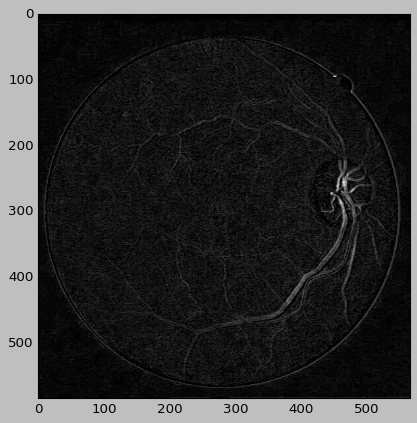

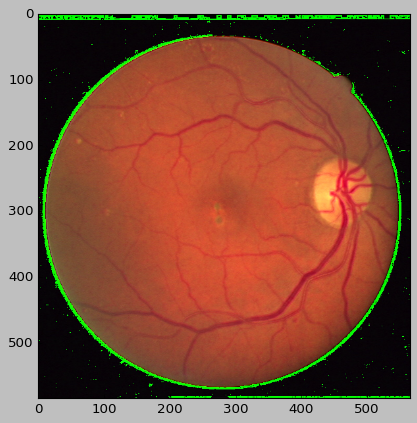

In [185]:
# import the necessary packages 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\25_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

(R,G,B) = cv2.split(img)

size =11
kernel = np.ones((size, size), np.uint8)

R1 = cv2.morphologyEx(R, cv2.MORPH_BLACKHAT, kernel)
# R1 = np.where(R1>5,R1,0)
R7 = R - R1

G1 = cv2.morphologyEx(G, cv2.MORPH_BLACKHAT, kernel)
# G1 = np.where(G1>10,G1,0)
G7 = G - G1

B1 = cv2.morphologyEx(B, cv2.MORPH_BLACKHAT, kernel)
# B1 = np.where(B1>10,B1,0)
B7 = B - B1

size =5
kernel = np.ones((size, size), np.uint8)

R8 = cv2.dilate(R1,kernel)
G8 = cv2.dilate(G1,kernel)
B8 = cv2.dilate(B1,kernel)

R9 = R - R8
G9 = G - G8
B9 = B - B8

img2 = cv2.merge([R,G9,B])
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.imshow(B1,cmap=plt.cm.gray)
plt.show()
plt.imshow(img2)



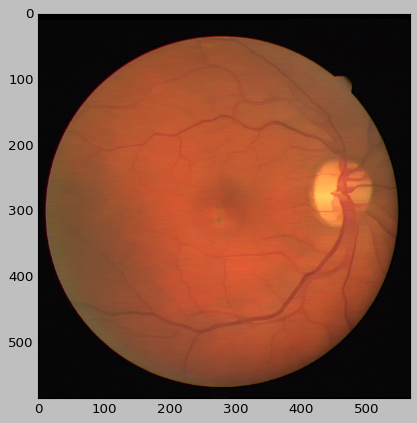

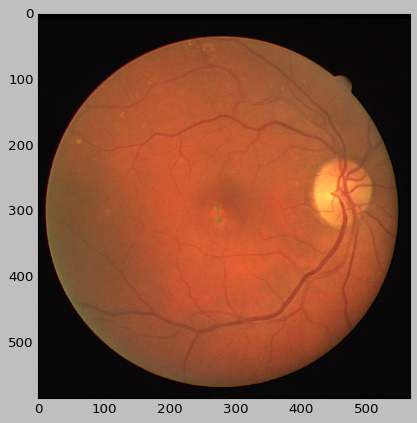

In [5]:
# import the necessary packages 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\25_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

(R,G,B) = cv2.split(img)

size =13
kernel = np.ones((size, size), np.uint8)
angle_step = 22.5
anchor_point = (size//2,0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size, 1), anchor_point)

R1 = cv2.morphologyEx(R, cv2.MORPH_TOPHAT, kernel)
# R1 = np.where(R1>5,R1,0)
R7 = R - R1

G1 = cv2.morphologyEx(G, cv2.MORPH_TOPHAT, kernel)
# G1 = np.where(G1>10,G1,0)
G7 = G - G1

B1 = cv2.morphologyEx(B, cv2.MORPH_TOPHAT, kernel)
# B1 = np.where(B1>10,B1,0)
B7 = B - B1

img3 = cv2.merge([R7,G7,B])
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img3)
plt.show()
plt.imshow(img)

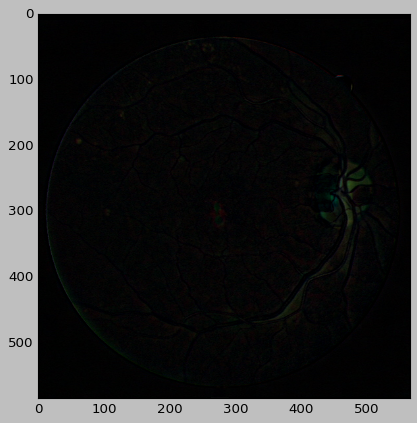

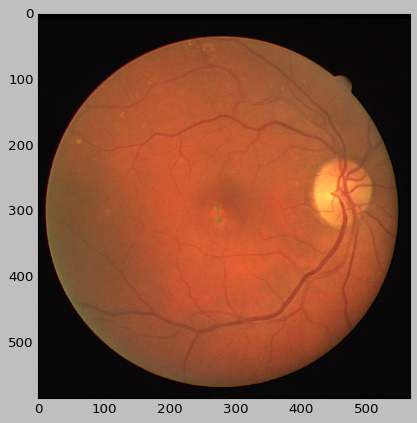

In [220]:
# import the necessary packages 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\25_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

(R,G,B) = cv2.split(img)

size =13
kernel = np.ones((size, size), np.uint8)

R1 = cv2.morphologyEx(R, cv2.MORPH_OPEN, kernel)
# R1 = np.where(R1>5,R1,0)
R7 = R - R1

G1 = cv2.morphologyEx(G, cv2.MORPH_OPEN, kernel)
# G1 = np.where(G1>10,G1,0)
G7 = G - G1

B1 = cv2.morphologyEx(B, cv2.MORPH_OPEN, kernel)
# B1 = np.where(B1>10,B1,0)
B7 = B - B1

img2 = cv2.merge([R7,G7,B7])
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.show()
plt.imshow(img)

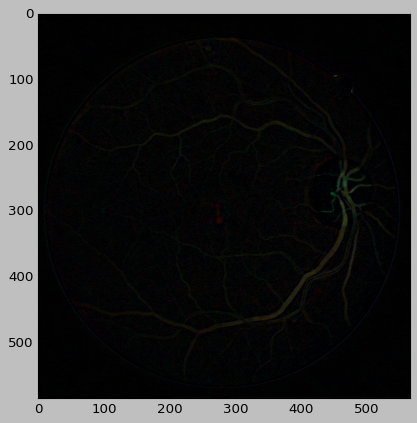

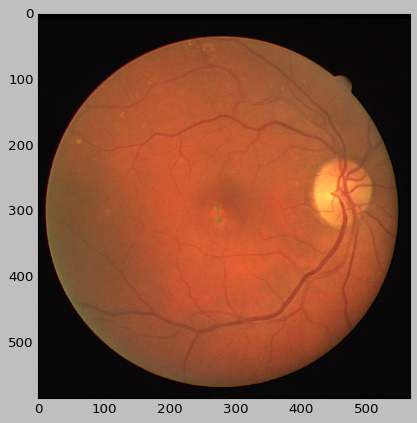

In [154]:
# import the necessary packages 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\25_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

(R,G,B) = cv2.split(img)

size =11
kernel = np.ones((size, size), np.uint8)

R1 = cv2.morphologyEx(R, cv2.MORPH_CLOSE, kernel)
# R1 = np.where(R1>5,R1,0)
R7 = R1 - R

G1 = cv2.morphologyEx(G, cv2.MORPH_CLOSE, kernel)
# G1 = np.where(G1>10,G1,0)
G7 = G1 - G

B1 = cv2.morphologyEx(B, cv2.MORPH_CLOSE, kernel)
# B1 = np.where(B1>10,B1,0)
B7 = B1 - B

img2 = cv2.merge([R7,G7,B7])
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.show()
plt.imshow(img)

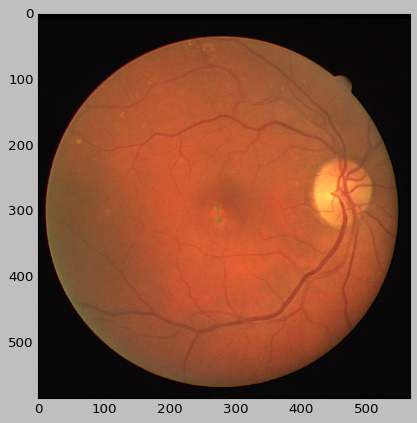

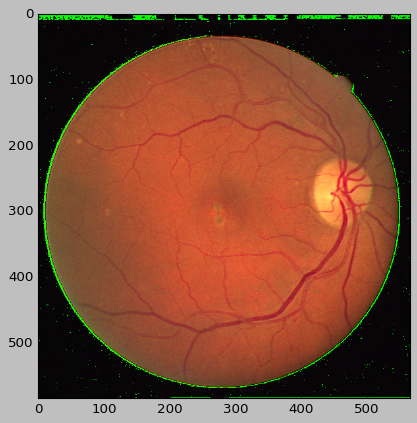

In [242]:
# import the necessary packages 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\25_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

(R,G,B) = cv2.split(img)

bR = np.where((R>150),220,0)
bG = np.where((G>150),220,0)
bB = np.where((B>150),220,0)

size =11
kernel = np.ones((size, size), np.uint8)

R1 = cv2.morphologyEx(R, cv2.MORPH_BLACKHAT, kernel)
# R1 = np.where(R1>5,R1,0)
R7 = R - R1

G1 = cv2.morphologyEx(G, cv2.MORPH_BLACKHAT, kernel)
# G1 = np.where(G1>10,G1,0)
G7 = G - G1

B1 = cv2.morphologyEx(B, cv2.MORPH_BLACKHAT, kernel)
# B1 = np.where(B1>10,B1,0)
B7 = B - B1

size =1
kernel = np.ones((size, size), np.uint8)

R8 = cv2.dilate(R1,kernel)
G8 = cv2.dilate(G1,kernel)
B8 = cv2.dilate(B1,kernel)

R9 = R - R8
G9 = G - G8
B9 = B - B8

img2 = cv2.merge([R,G9,B])
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.imshow(img)
plt.show()
plt.imshow(img2)



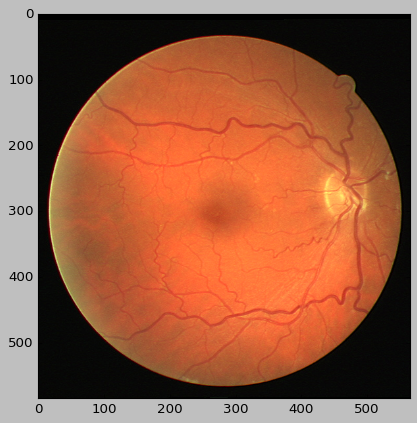

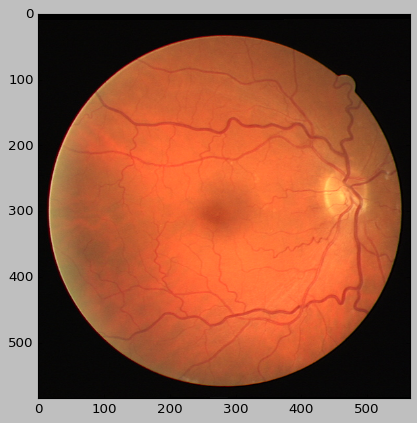

In [18]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\22_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

(R,G,B) = cv2.split(img)

size =7
kernel = np.ones((size, 1), np.uint8)

Ra1 = cv2.morphologyEx(R, cv2.MORPH_TOPHAT, kernel)
# R1 = np.where(R1>5,R1,0)

Ga1 = cv2.morphologyEx(G, cv2.MORPH_TOPHAT, kernel)
# G1 = np.where(G1>10,G1,0)

Ba1 = cv2.morphologyEx(B, cv2.MORPH_TOPHAT, kernel)
# B1 = np.where(B1>10,B1,0)

Ra7 = R + Ra1
Ga7 = G + Ga1
Ba7 = B + Ba1

size =7
kernel = np.ones((1, size), np.uint8)

Rb1 = cv2.morphologyEx(R, cv2.MORPH_TOPHAT, kernel)
# R1 = np.where(R1>5,R1,0)

Gb1 = cv2.morphologyEx(G, cv2.MORPH_TOPHAT, kernel)
# G1 = np.where(G1>10,G1,0)

Bb1 = cv2.morphologyEx(B, cv2.MORPH_TOPHAT, kernel)
# B1 = np.where(B1>10,B1,0)

Rb7 = R + Rb1
Gb7 = G + Gb1
Bb7 = B + Bb1

R1 = np.maximum(Ra1,Rb1)
G1 = np.maximum(Ga1,Gb1)
B1 = np.maximum(Ba1,Bb1)

R7 = R + R1
G7 = G + G1
B7 = B + B1

img1 = cv2.merge([R,G7,B])
img2 = cv2.merge([R1,G1,B1])
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()
# plt.imshow(img3)
# plt.show()
plt.imshow(img)

(584, 565)


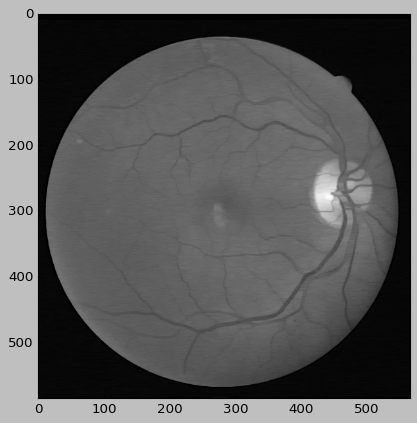

In [41]:
# import the necessary packages 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\25_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

(R,G,B) = cv2.split(img)

opening_kernel_size = 7
# opening_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (opening_kernel_size, 1)).astype(np.uint8)

# Apply opening operation (erosion followed by dilation)
# opened_image = cv2.morphologyEx(G, cv2.MORPH_OPEN, opening_kernel)

# Calculate the maximum response of 12 directions
# max_response = np.max([cv2.filter2D(opened_image, cv2.CV_32F, kernel) for kernel in [
#     cv2.getRotationMatrix2D((opening_kernel_size // 2, 0), angle, 1)[:, :2] for angle in range(0, 180, 15)
# ]], axis=0)


# Calculate the maximum response of 12 directions
opening_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (opening_kernel_size, 1)).astype(np.uint8)  # Ensure the data type is uint8

# Calculate the maximum response of 12 directions
max_response = np.max([cv2.morphologyEx(G, cv2.MORPH_OPEN, opening_kernel, cv2.getRotationMatrix2D((opening_kernel_size // 2, 0), angle, 1)) for angle in range(0, 180, 15)], axis=0)





print(max_response.shape)
# Ensure max_response is of type np.float32
max_response = max_response.astype(np.float32)

# Apply reconstruction operation
# smoothed_image = cv2.remap(max_response, opened_image, None, interpolation=cv2.INTER_LINEAR)

# Apply reconstruction operation using warpAffine
# smoothed_image = cv2.warpAffine(max_response, np.eye(2), (opened_image.shape[1], opened_image.shape[0]), flags=cv2.WARP_INVERSE_MAP, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

# Apply reconstruction operation using warpAffine
smoothed_image = cv2.warpAffine(max_response, np.float32([[1, 0, 0], [0, 1, 0]]), (opened_image.shape[1], opened_image.shape[0]), flags=cv2.WARP_INVERSE_MAP, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

top_hat_sum = np.zeros_like(smoothed_image, dtype=np.float32)
for angle in range(0, 180, 15):
    rotation_matrix = cv2.getRotationMatrix2D((opening_kernel_size // 2, 0), angle, 1)
    rotated_smoothed_image = cv2.warpAffine(smoothed_image, rotation_matrix, (smoothed_image.shape[1], smoothed_image.shape[0]))
    top_hat = cv2.subtract(rotated_smoothed_image, smoothed_image)
    top_hat_sum += top_hat

# Convert the result to uint8
top_hat_sum = np.clip(top_hat_sum, 0, 255).astype(np.uint8)

top_hat_sum = G - smoothed_image
# Apply Gaussian filter with a width of 7 pixels
smoothed_after_morphology = cv2.GaussianBlur(top_hat_sum, (7, 7), 0)

plt.imshow(smoothed_image, cmap=plt.cm.gray)
plt.show()


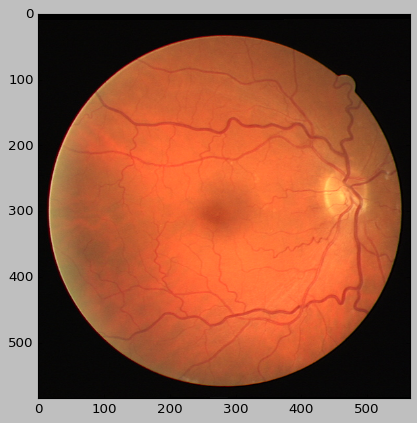

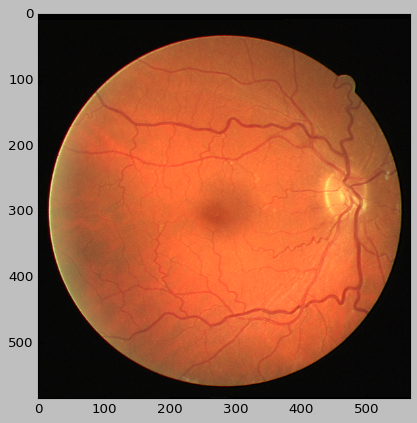

In [20]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('classic')
  
# read the image 
img = cv2.imread("E:\\taha\\code\\Retina-VesselNet\\DRIVE\\training\\images\\22_training.tif") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

(R,G,B) = cv2.split(img)

opening_kernel_size =7
# kernel = np.ones((size, 1), np.uint8)

# Calculate the maximum response of 12 directions
opening_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (opening_kernel_size, 1)).astype(np.uint8)  # Ensure the data type is uint8

tops = []
for angle in range(0, 180, 15):
    mat = cv2.getRotationMatrix2D((opening_kernel_size // 2, 0), angle, 1)
    tops.append(cv2.morphologyEx(G, cv2.MORPH_TOPHAT, opening_kernel, mat))

G1 = np.max(tops, axis=0)


G7 = G + G1

img2 = cv2.merge([R,G7,B])
# img2 = cv2.merge([R1,G1,B1])
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
# plt.imshow(img3)
# plt.show()
plt.imshow(img2)